[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lisuex/Machine-Learning2025/blob/main/Lab04.ipynb)

In [313]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [314]:
# Prepare the data
np.random.seed(42)

n_samples = 1000
n_features = 200

X = np.random.randn(n_samples, n_features)

true_coef = np.zeros(n_features + 1)
true_coef[0] = 100.0
true_coef[1:10] = [5, -4, 3, -2, 1, 10, 3, -5, -8]
X_with_beta_0 = np.c_[np.zeros(n_samples), X]

noise = 5 * np.random.randn(n_samples)
y = X_with_beta_0 @ true_coef + noise

In [315]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
def compute_bias_variance_mse(model, X_train, X_test, y_train, y_test):
    # fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    bias_squared = (np.mean(y_pred) - np.mean(y_test)) ** 2
    variance = np.var(y_pred)

    return bias_squared, variance, mse

In [317]:
lambdas = np.logspace(-8, 4, 100)

ridge_bias_squared, ridge_variance, ridge_mse = [], [], []
lasso_bias_squared, lasso_variance, lasso_mse = [], [], []

for lambda_ in lambdas:
    # apply Ridge with given lambda
    ridge = Ridge(alpha=lambda_)
    bias_sq, var, mse = compute_bias_variance_mse(ridge, X_train, X_test, y_train, y_test)
    ridge_bias_squared.append(bias_sq)
    ridge_variance.append(var)
    ridge_mse.append(mse)

    # apply Lasso with given lambda
    lasso = Lasso(alpha=lambda_, max_iter=10000)
    bias_sq, var, mse = compute_bias_variance_mse(lasso, X_train, X_test, y_train, y_test)
    lasso_bias_squared.append(bias_sq)
    lasso_variance.append(var)
    lasso_mse.append(mse)

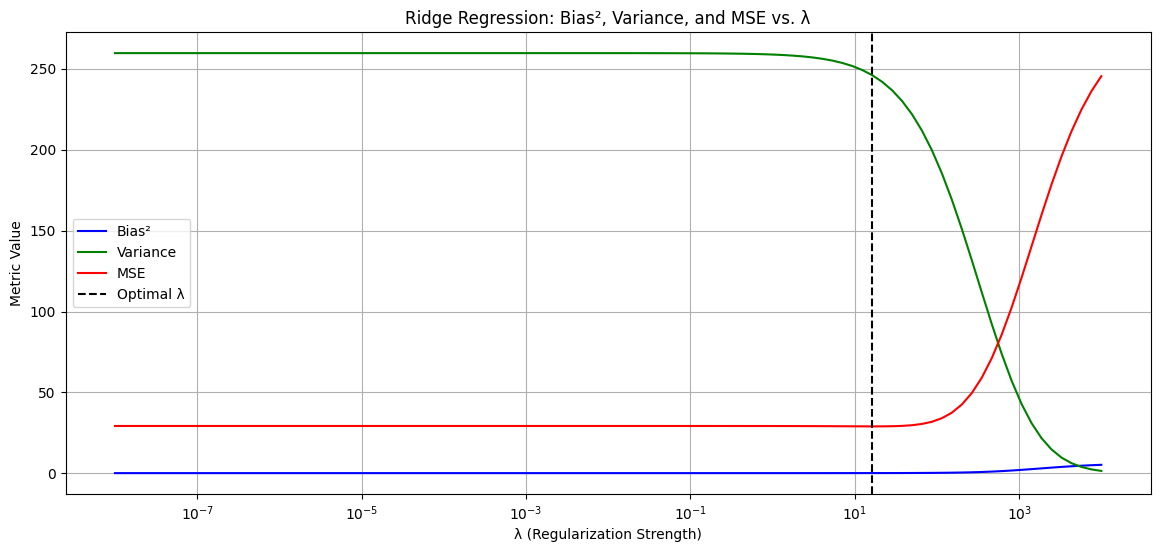

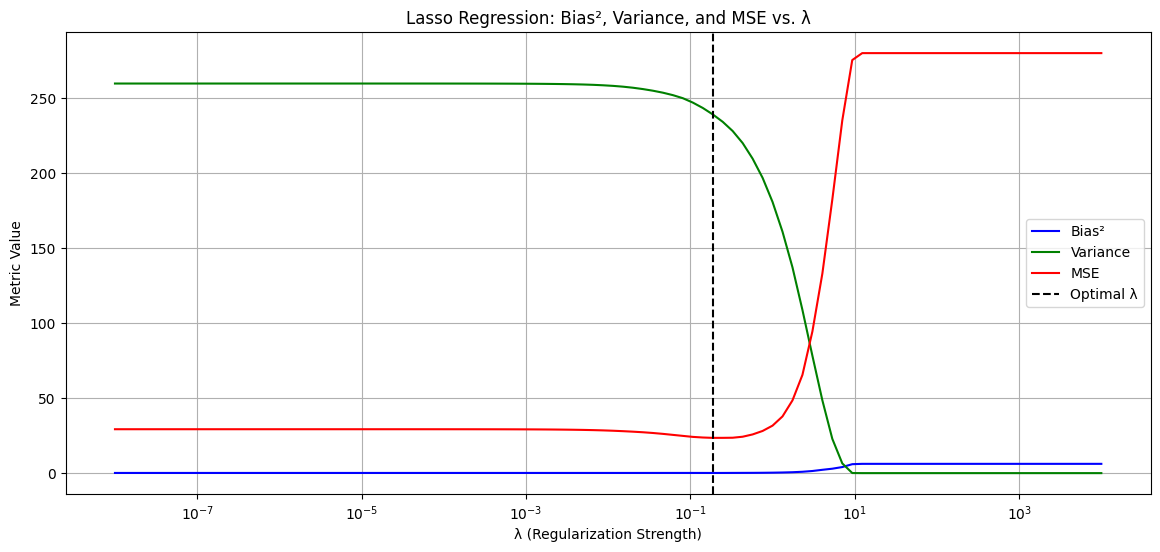

In [318]:
# plot the results (Bias, Variance, MSE) for different lambdas
plt.figure(figsize=(14, 6))
plt.semilogx(lambdas, ridge_bias_squared, label="Bias²", color="blue")
plt.semilogx(lambdas, ridge_variance, label="Variance", color="green")
plt.semilogx(lambdas, ridge_mse, label="MSE", color="red")
plt.axvline(lambdas[np.argmin(ridge_mse)], color="black", linestyle="--", label="Optimal λ")
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Metric Value")
plt.title("Ridge Regression: Bias², Variance, and MSE vs. λ")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.semilogx(lambdas, lasso_bias_squared, label="Bias²", color="blue")
plt.semilogx(lambdas, lasso_variance, label="Variance", color="green")
plt.semilogx(lambdas, lasso_mse, label="MSE", color="red")
plt.axvline(lambdas[np.argmin(lasso_mse)], color="black", linestyle="--", label="Optimal λ")
plt.xlabel("λ (Regularization Strength)")
plt.ylabel("Metric Value")
plt.title("Lasso Regression: Bias², Variance, and MSE vs. λ")
plt.legend()
plt.grid(True)
plt.show()

**Questions**

**1) Investigate how increasing  λ  influences the model’s bias, variance, and Mean Squared Error (MSE).**

  In both methods (Ridge and Lasso) MSE at the beginning slighly decrease and then increase, Variance decrease and Bias stayed almost the same (it slightly increases). However in Lasso method, MSE increase was definitiely sharper than in Ridge method.


  **2) Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.**

  The Mean Squared Error (MSE) can be decomposed into three components:

$$
\text{MSE} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
$$


**3) Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**\

Yes, because for small lambda the model may overfit because of higher MSE, high variance and low bias. For big lambdas the model becomes "underfit" because of big MSE and low Variance. The optimal point is when the MSE is minimalized, it exists because moving slowly from "overfitting" to "underfitting" goes through the minimilized MSE point as it decreases at the beginning and increases later.

**4) Analyze how Ridge and Lasso differ in terms of their bias-variance trade-offs.**

As we can see in the plots, in Ridge method bias and variance changes more gradually, while in Lasso it changes more sharply.


**5) Discuss situations where one method may outperform the other, considering factors like feature sparsity and multicollinearity.**

Ridge method outperforms Lasso when predictors are highly correlated (multicollinearity), while Lasso outperforms Ridge when only a few predictors are relevant (sparsity)